# Multichannel quering system with limited query

**Цель проекта:** Построение модели системы массового обслуживания с ограниченной очередью для оценки качества обслуживания клиентов.

**Входные данные:** Среднее число клиентов в ед. времени, средняя интенсивность обслуживания клиентов в ед. времени.

**Выходные данные:**

Операционные характеристики обслуживания: 
- средняя длина очереди; 
- среднее время пребывания в очереди;
- пропускная способность;
- среднее время обслуживания клиента;
- вероятность отказа;
- финансовые характеристики обслуживания.

**Выходные данные для бизнеса:**

Информация о необходимом и финансово эффективном изменении системы обслуживания.

In [181]:
# Обработка данных
import numpy as np
import pandas as pd
import math

# Отрисовка графиков
from PIL import Image, ImageDraw, ImageFont
from matplotlib import pyplot as plt
import seaborn as sns

------------- Kolmogorov's differential equations system -------------

-λ μ 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
λ -(λ+μ) 2*μ 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 λ -(λ+2*μ) 3*μ 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 λ -(λ+3*μ) 4*μ 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 λ -(λ+4*μ) 5*μ 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 λ -(λ+5*μ) 5*μ 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 λ -(λ+5*μ) 5*μ 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 λ -(λ+5*μ) 5*μ 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 λ -(λ+5*μ) 5*μ 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 λ -(λ+5*μ) 5*μ 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 λ -(λ+5*μ) 5*μ 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 λ -(λ+5*μ) 5*μ
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 λ -5*μ

--------- Computing operational characteristics ---------

                          Operational characteristics
refuse_probability                           0.000918
relational_throughput                        0.999082
abs

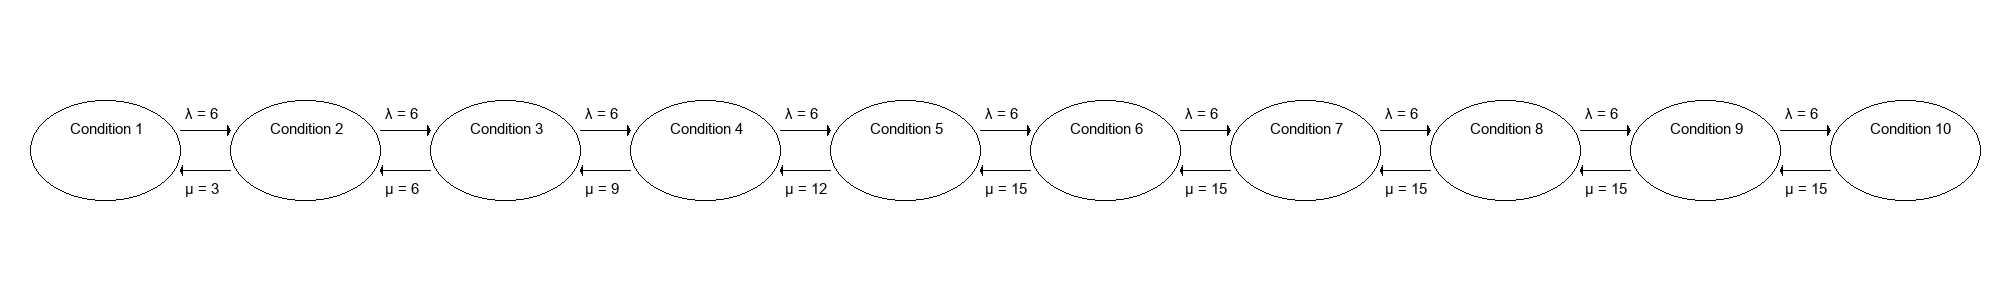

In [295]:
class MultyQueruingSystem():
    
    def __init__(self, lambd=0, mu=0, channels=2, query=0, cost=None, revenue=None):
        
        """ Takes the following arguments:
            - mu - servability in time unit;
            - query - available length of queue;
            - lambd - client's flow in time unit;
            - channels - the number of serving entities;
            - cost - money spending on channel's work
            - revenue - average money per client
        """
        
        self.channels = channels
        self.lam = lambd
        self.mu = mu
        self.query = query
        self.conditions = self.channels+self.query+1
        self.cost = cost
        self.revenue = revenue
        
    def arrowedLine(im, ptA:tuple, ptB:tuple, width=1, color=(0,0,0)):
        """Draw line from ptA to ptB with arrowhead at ptB"""
        draw = ImageDraw.Draw(im)
        draw.line((ptA,ptB), width=width, fill=color)

        x0, y0 = ptA
        x1, y1 = ptB
        
        xb = 0.95*(x1-x0)+x0
        yb = 0.95*(y1-y0)+y0

        if x0==x1:
            vtx0 = (xb-5, yb)
            vtx1 = (xb+5, yb)
            
        elif y0==y1:
            vtx0 = (xb, yb+5)
            vtx1 = (xb, yb-5)
            
        else:
            alpha = math.atan2(y1-y0,x1-x0)-90*math.pi/180
            a = 8*math.cos(alpha)
            b = 8*math.sin(alpha)
            vtx0 = (xb+a, yb+b)
            vtx1 = (xb-a, yb-b)
        
        draw.polygon([vtx0, vtx1, ptB], fill=color)
        return im
        
    def state_graph(self, x=50, y=100, z=200, d=200):
        """ Drawing a condition's graph for n channels and given labmda, mu. 
        """
        
        im = Image.new('RGB', (200*self.conditions, 300), (255, 255, 255))
        draw = ImageDraw.Draw(im)

        for i in range(self.conditions):

            draw.ellipse((x-20, y, z-20, 200), fill='white', outline=(0, 0, 0))
            headline = ImageFont.truetype("arial.ttf", size=15)
            draw.text((x+20, y+20), f"Condition {i+1}", fill="black", font=headline)
            if i != 0:
                im = arrowedLine(im, (x-70, y+30), (z-170, 130))
                draw.text((x-65, y+5), f"λ = {self.lam}", fill="black", font=headline)
                im = arrowedLine(im, (z-170, 170), (x-70, y+70))
                if i < self.channels:
                    draw.text((x-65, y+80), f"μ = {round(self.mu*i,3)}", fill="black", font=headline)
                else:
                    draw.text((x-65, y+80), f"μ = {round(self.mu*self.channels,3)}", fill="black", font=headline)

                
            x += 200
            z += 200
            
        print()
        print("------------------ The graph of system's conditions ------------------")
        print()
        return im
    
    
    def kolmogorov_system(self):
        """ Returns Kolmogorov's system of differential equations for given set of parameters.
            I-th row of matrix represents the differential equation for being in i-th system's state.
        """
        assert self.channels > 1, 'Increase query'
        n = self.channels*2+self.query
        matrix = [list(i) for i in np.zeros(shape=(n, n-1))]

        for index in range(len(matrix)-2):
            if index < self.channels:
                matrix[0][0] = "-λ"
                matrix[0][1] = "μ"
                matrix[1][0] = "λ"
                matrix[1][1] = "-(λ+μ)"
                matrix[1][2] = "2*μ"
    
                matrix[2+index][1+index] = "λ"
                matrix[1+index][1+index] = f"-(λ+{index+1}*μ)"
                matrix[1+index][2+index] = f"{index+2}*μ"
    
            else:
                matrix[0+index][1+index] = "λ"
                matrix[index][0+index] = f"-(λ+{self.channels}*μ)"
                matrix[index][1+index] = f"{self.channels}*μ"

            matrix[index+1][index] = "λ"
            matrix[:5]

        matrix[-2][-1] = f"-{self.channels}*μ"
        matrix = matrix[:-1]
        
        print("------------- Kolmogorov's differential equations system -------------")
        print()
        for i in range(len(matrix)):
            print(*matrix[i])
        print()
            
    def compute_statistics(self):
        """ Returns the set of probabilities and operational statistics:
        
            p_i - stationar probabilities of system's condition i
            or the average relative time the system stays in this state;
            
            refuse_probability - the probability that the client will leave the company without service;
            
            absolute_throughput - average number of clients served per unit of time;
            
            relational_throughput - average % of customers served per unit of time;
            
            average_query - average queue length;
            
            average_time_per_serving - average service waiting time for client which started getting the service;
            
            average_time_per_waiting - average client's time spending for both serving and waiting in a queue;
            
        """
        
        p0 = 0
        p = self.lam/self.mu
        
        assert p/self.channels < 1, 'Stationar probabilities do not exist. Please, increase the number of channels.'

        for n in range(self.channels+1):
            p0 += p**(n)/math.factorial(n)
        denominator = self.channels*math.factorial(self.channels)*(1-(p/self.channels))
        numerator = (p**(self.channels+1))*(1-((p/self.channels)**(self.query)))
        p0 += numerator/denominator
        p0 = p0**(-1)
        p_ = {}
        p_['p_0'] = p0

        for condition in range(1, self.channels+1):
            p_[f'p_{condition}'] = ((p**condition)*p0)/math.factorial(condition)

        q = 1
        for condition in range(self.channels+1, self.channels+1+self.query):
            p_[f'p_{condition}'] = (p0*(p**condition))/((self.channels**(q))*math.factorial(self.channels))
            q += 1

        refuse_probability = (p0*(p**(self.channels+self.query)))/((self.channels**self.query)*(math.factorial(self.channels)))
        relational_throughput = 1 - refuse_probability
        absolute_throughput = self.lam*relational_throughput
        average_query = ((p**(self.channels+1)*p0)*(1-(self.query+1-(self.query*p)/self.channels)*((p/self.channels)**(self.query))))/((self.channels*math.factorial(self.channels))*((1-(p/self.channels))**(2)))
        average_serving = p*(1-(((p**(self.channels+self.query))*p0)/((self.channels**(self.query))*math.factorial(self.channels))))
        average_time_per_serving = average_query/p
        average_clients = average_query + average_serving
        average_time_per_waiting = average_clients/p


        stationar = pd.DataFrame(index=p_.keys(), data=p_.values(), columns=['Stationar probabilities'])

        operational = pd.DataFrame(data=[refuse_probability,
                                         relational_throughput,
                                         absolute_throughput,
                                         average_query,
                                         average_serving,
                                         average_clients,
                                         average_time_per_serving,
                                         average_time_per_waiting
                                        ], 
                                   columns =['Operational characteristics'],
                                   index=['refuse_probability',
                                          'relational_throughput',
                                          'absolute_throughput',
                                          'average_query',
                                          'average_serving',
                                          'average_clients',
                                          'average_time_per_serving',
                                          'average_time_per_waiting'
                                         ]
                    )

        print("--------- Computing operational characteristics ---------")
        print()
        print(operational)
        print()
        print("--------- Computing stationar probabilities ---------")
        print()
        print(stationar)
        print(sum(list(p_.values())))
        profit = ((self.revenue*absolute_throughput)-(self.cost*self.channels)) # FIX ME
        rent = (profit*absolute_throughput)/(self.channels*self.cost) # FIX ME
        wasted = (profit*refuse_probability) if profit > 0 else 0w
        print()
        print("--------- Financial efficiency report ---------")
        print()
        print(f'Profit of current serving system = {round(profit,3)}')
        print(f'Rentability of current serving system = {round(rent*100, 3)}%')
        print(f'Wasted profit due to queue overflow = {round(wasted,3)}')
        print()
        return p_, refuse_probability, relational_throughput, absolute_throughput, average_query, average_serving, average_clients, average_time_per_serving,average_time_per_waiting
    
        
MultyQueruingSystem(lambd=6, mu=3, channels=5, query=4, cost=1500, revenue=1800).kolmogorov_system()
MultyQueruingSystem(lambd=6, mu=3, channels=5, query=4, cost=1500, revenue=1800).compute_statistics()
MultyQueruingSystem(lambd=6, mu=3, channels=5, query=4, cost=1500, revenue=1800).state_graph()
